- Retrieved and processed GTA apartment rental data, verifying the validity and appropriate structuring of geographic coordinates for spatial operations.
- Visualized rental listings using interactive geospatial visualizations, utilizing Folium to showcase property locations across the Greater Toronto Area and determine spatial clusters.
- Generated layers to illustrate spatial variations in average rent prices across neighborhoods, offering insight into regional affordability trends.
- Consolidated postal code and neighborhood boundary data, enhancing the dataset to enable spatial aggregation and more meaningful geographic comparisons.
- Structured the data for advanced spatial modeling with supplementary demographic or transit datasets.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%pip install folium
import folium
import requests
import statsmodels.api as sm
import statsmodels.formula.api as smf
np.random.seed(42)
plt.rcParams['figure.figsize'] = (14, 10)
#Note that we configure a custom default figure size.
#Virtually every default aspect of matplotlib can be customized (https://matplotlib.org/users/customizing.html).

%pip install scikit-learn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1124 non-null   int64  
 1   Bathrooms  1124 non-null   float64
 2   Dens       1124 non-null   int64  
 3   Latitude   1124 non-null   float64
 4   Longitude  1124 non-null   float64
 5   Price      1124 non-null   int64  
 6   Sq.Ft      1124 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 61.6 KB


<Axes: xlabel='Bedrooms', ylabel='count'>

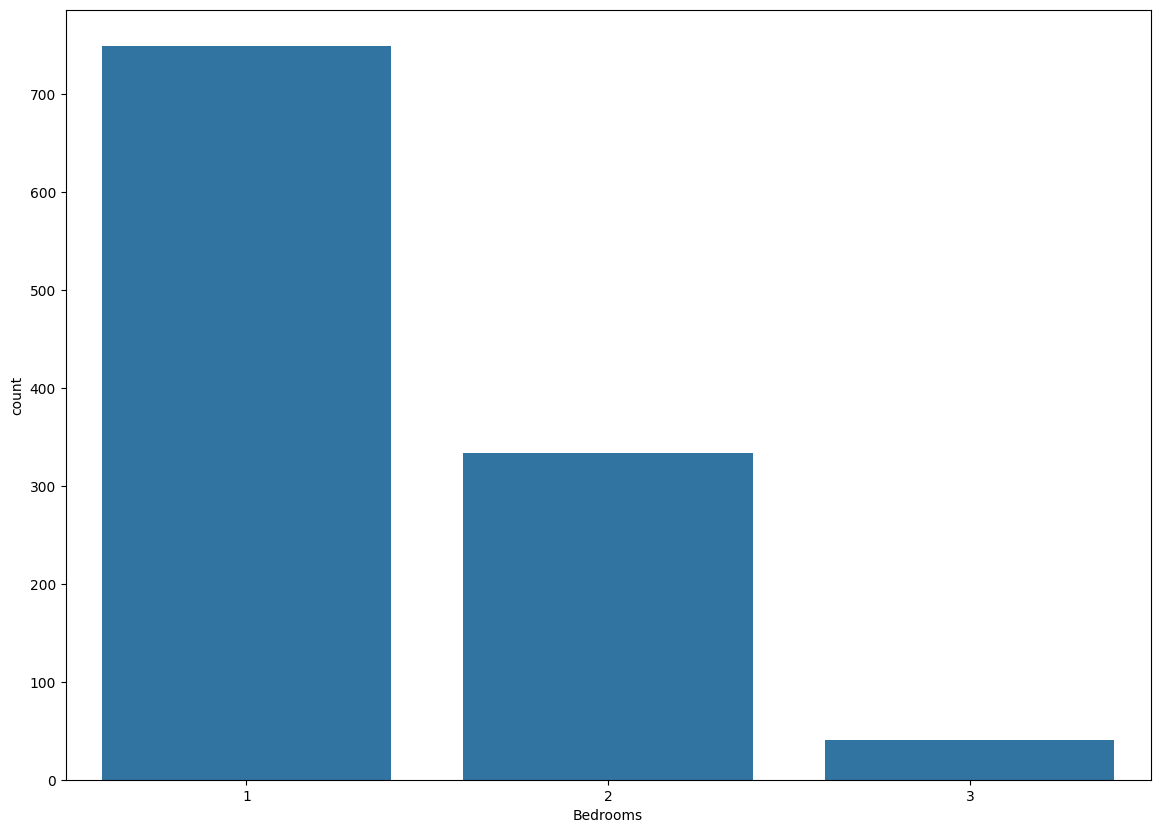

In [2]:
gta_rentals = pd.read_csv("https://raw.githubusercontent.com/Xuyang-Ma-WLU/LAB-DATASETS/refs/heads/main/DATA200/GTA_Apt_Rentals_2018.csv")


gta_rentals.info()


gta_rentals["Bedrooms"] = gta_rentals["Bedrooms"].astype("category")
gta_rentals["Bathrooms"] = gta_rentals["Bathrooms"].astype("category")


sns.countplot(x="Bedrooms", data=gta_rentals)

<Axes: xlabel='Bathrooms', ylabel='count'>

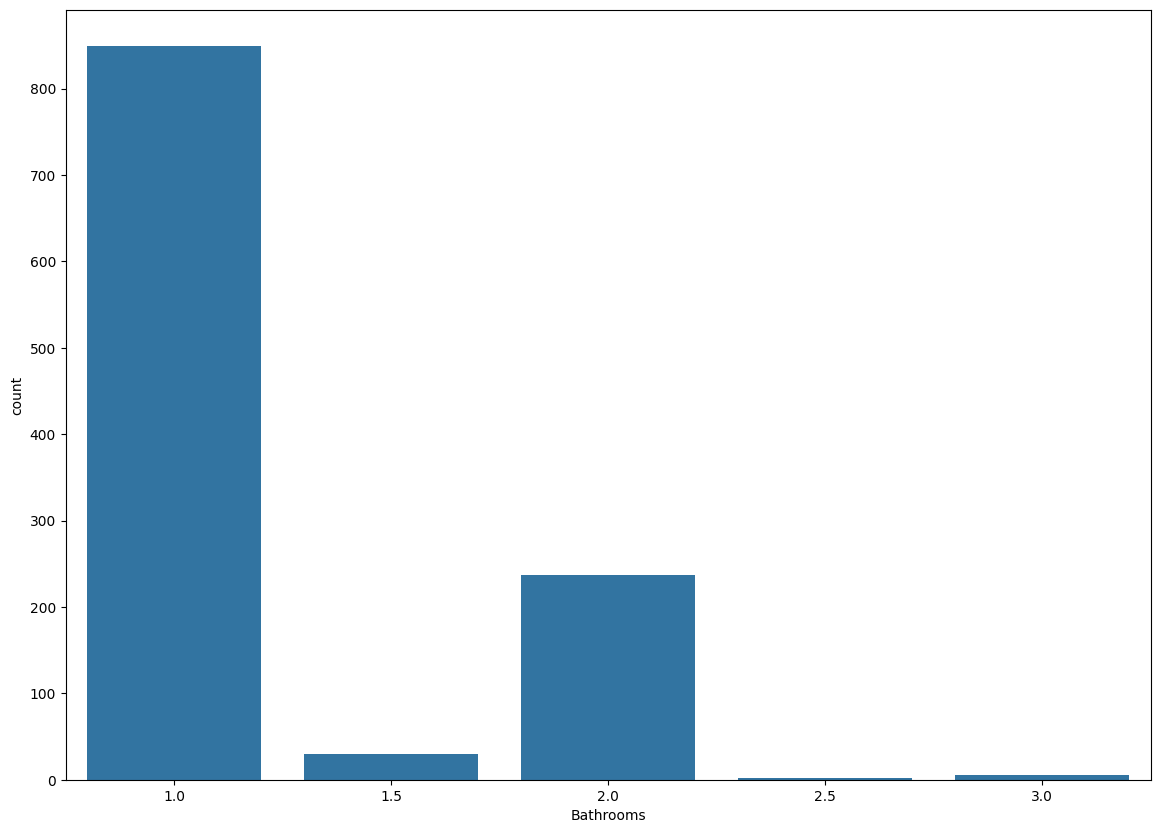

In [4]:
sns.countplot(x="Bathrooms", data=gta_rentals)

## Some insight so far:

a) In terms of the number of bedrooms, which type of apartment appears to be most common?
    
1 bedroom

b) In terms of the number of bathrooms, which type of apartment appears to be most common?

1 bathroom
    
c) In terms of the number of bathrooms and bedrooms, what would you guess is the most common type of apartment?

1 bedroom and bathroom
    
d) What do the bar charts suggest about the skewness of the data for the number of bedrooms and bathrooms?

They both appear to be skewed to the right (or positively skewed).




,Dens,Latitude,Longitude,Price,Sq.Ft
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,0.153025,43.703532,-79.500326,3627.912811,1180.714413
std,0.360172,0.692689,1.760654,27530.542058,387.263481
min,0.000000,42.985767,-114.082215,65.000000,500.000000
25%,0.000000,43.641355,-79.414319,1759.250000,893.750000
50%,0.000000,43.650560,-79.387295,2100.000000,1107.500000
75%,0.000000,43.666613,-79.377198,2500.000000,1480.000000
max,1.000000,56.130366,-73.576385,535000.000000,2000.000000


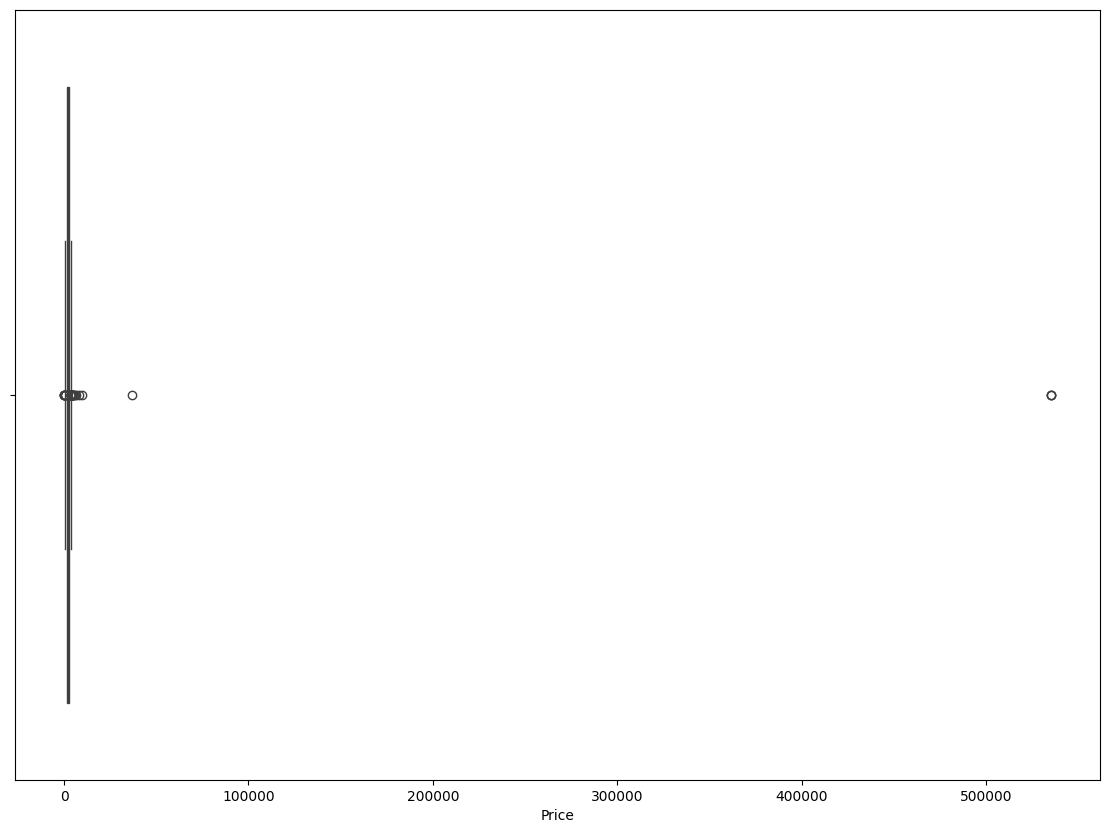

In [5]:
sns.boxplot(x="Price", data=gta_rentals)
gta_rentals.describe()

## Some insight on prevoius cell

a) What are the minimum, maximum, mean, and median monthly rental prices of an apartment?
    
$65, $535000, $3627.91, and $2100 are the min, max, mean, and median prices.
    
b) What is the standard deviation in monthly rental prices?  Logically, does this answer make sense?

The standard deviation is $27530.54 which, loosely defined, gives the average distance a rental price is from the mean rental price.  So, the value of $27530.54 does not intuitively make sense.

c) If the rentals are meant to be for the "average Ontarian", do any of the price data seem "out of place"? That is, are there any extreme outliers? Does boxplot for price of the apartment strengthen your judgment?

There are definitely some extreme outliers in both directions.  The min and max values of $65 and $535000 are clearly unrealistic values for monthly apartment rental costs. Yes, a boxplot for the price of the apartment strengthens the judgment.
    
d) What are the minimum, maximum, mean, and median square feet of an apartment?
    
500, 2000, 1180.71, and 1107.5 are the min, max, mean, and median square footages.
    
e) Does any of the square footage data seem "out of place"? That is, are there any extreme outliers?
    
Looking at the summary, the values all seem reasonable

Now let's look at the Longitude (a measure of east/west location on earth) and Latitude variables (south/north location on earth) of "gta_rentals" dataset. These two columns provide the geo-spatial location of the apartments on the earth.

Doing an internet search, it is easy to find that the latitude and longitude on Toronto is approximately 43.7 degrees latitude (north/south), -79.4 degrees longitude (east/west).

To have better visualization, we would use the Folium library to display an interactive map along with points plotted on it. You can also zoom-in or zoom-out to understand the data.

In [6]:
locations = gta_rentals[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
map = folium.Map(location=[43.7,  -79.4], zoom_start=4)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point]).add_to(map)
map

<Axes: xlabel='Longitude', ylabel='Latitude'>

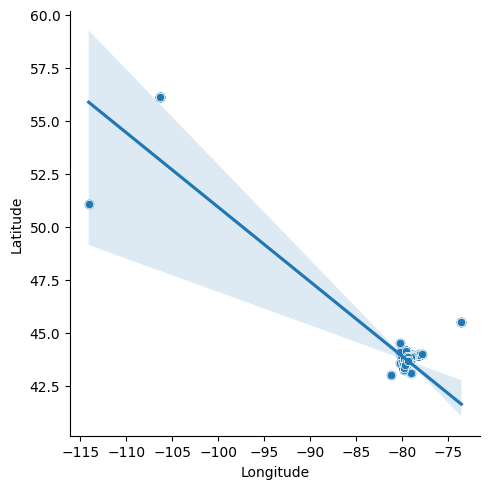

In [7]:
# Scatter plot of Latitude vs Longitude
sns.lmplot(x="Longitude", y="Latitude", data=gta_rentals)

sns.scatterplot(x="Longitude", y="Latitude", data=gta_rentals)

<Axes: xlabel='Latitude', ylabel='Count'>

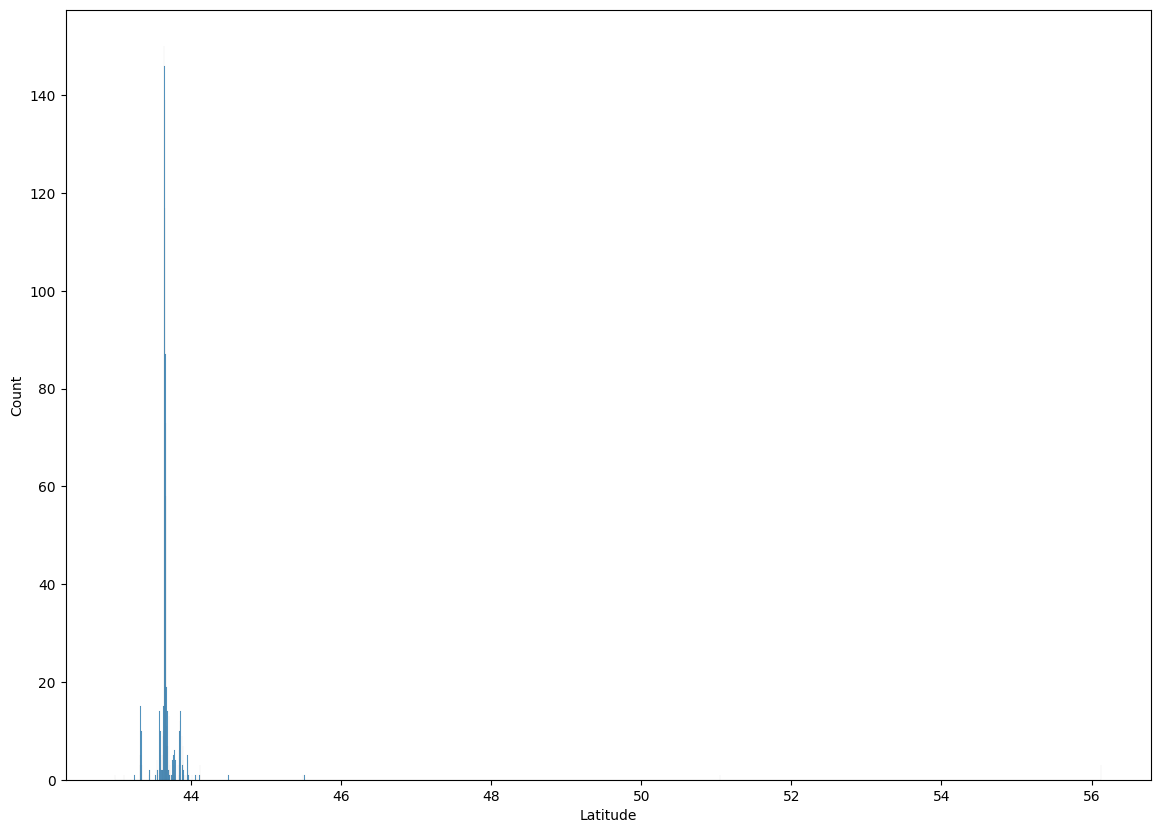

In [8]:
sns.histplot(gta_rentals["Latitude"])

,Dens,Latitude,Longitude,Price,Sq.Ft
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,0.153025,43.703532,-79.500326,3627.912811,1180.714413
std,0.360172,0.692689,1.760654,27530.542058,387.263481
min,0.000000,42.985767,-114.082215,65.000000,500.000000
25%,0.000000,43.641355,-79.414319,1759.250000,893.750000
50%,0.000000,43.650560,-79.387295,2100.000000,1107.500000
75%,0.000000,43.666613,-79.377198,2500.000000,1480.000000
max,1.000000,56.130366,-73.576385,535000.000000,2000.000000


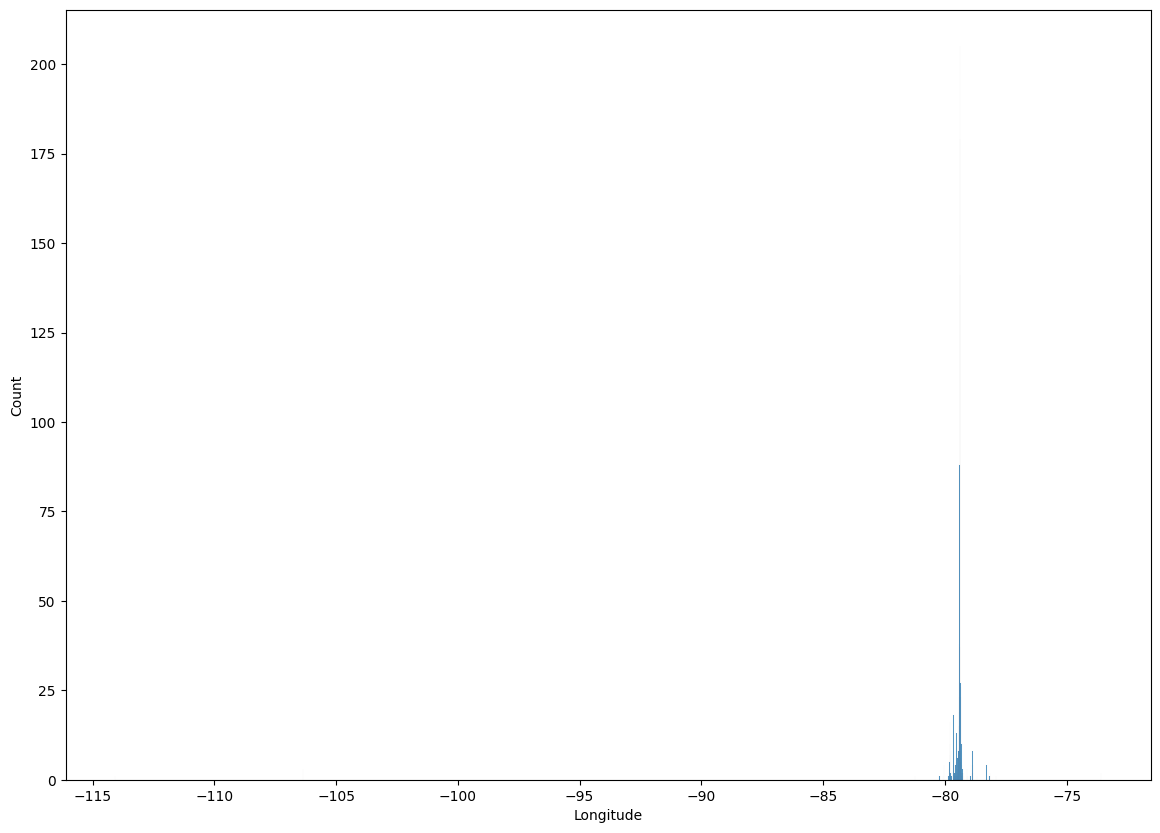

In [9]:
sns.histplot(gta_rentals["Longitude"])

# descriptive statistics of latitude and longitude data

gta_rentals.describe()

Based on the scatterplot, histograms and descriptive statistics answers are discussed below:
a) In terms of latitude (i.e. south/north), which range appears most common?
43 to 45

b) In terms of longitude (i.e. east/west), which range appears most common?
-79 to -81

c) What are the mean and median latitude of an apartment in the data set?
The mean is 43.7 while the median is 43.65.

d) What are the mean and median longitude of an apartment in the data set?
The mean is -79.50 while the median is -79.39.

e) Does any of the data seem "out of place"? That is, are there any extreme outliers? What does this suggest about the data set claiming that the apartments are from the Greater Toronto Area?
There are some extreme outliers in both latitude and longitude which suggests that some of the data is not from the Greater Toronto Area.


Let's add two new variables in the "gta_rentals" data set:

The first variable is the difference between each apartment's latitude and Toronto's latitude (call the variable Lat_diff)

The second variable is similar to the first new variable but using each apartment's longitude (call it Long_diff).

In [10]:
gta_rentals["Lat_diff"] = gta_rentals["Latitude"] - 43.7
gta_rentals["Long_diff"] = gta_rentals["Longitude"] + 79.4
gta_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Bedrooms   1124 non-null   category
 1   Bathrooms  1124 non-null   category
 2   Dens       1124 non-null   int64   
 3   Latitude   1124 non-null   float64 
 4   Longitude  1124 non-null   float64 
 5   Price      1124 non-null   int64   
 6   Sq.Ft      1124 non-null   int64   
 7   Lat_diff   1124 non-null   float64 
 8   Long_diff  1124 non-null   float64 
dtypes: category(2), float64(4), int64(3)
memory usage: 64.1 KB


Now, I will use the .sort_values(...) command to sort the gta_rental's Lat_diff and Long_diff variables to answer how many apartments are:

a) more than 1 degree (i.e. lat_diff > 1) or over 100 km north of Toronto?

b) more than 1 degree south of Toronto?

c) more than 2 degrees or over 160 km east of Toronto?

d) more than 2 degrees or over 160 km west of Toronto?

[Notice how far some are from Toronto: -34.68 degrees (or ~3000 km) west of Toronto is basically Calgary.]



In [ ]:
gta_rentals["Lat_diff"].sort_values(ascending=False).head(10)
gta_rentals["Lat_diff"].sort_values()
gta_rentals["Long_diff"].sort_values(ascending=False).head(10)
gta_rentals["Long_diff"].sort_values().head(10)


a) more than 1 degree (i.e. lat_diff > 1) or over 100 km north of Toronto?  
6

b) more than 1 degree south of Toronto?  
0

c) more than 2 degrees or over 160 km east of Toronto?
2

d) more than 2 degrees or over 160 km west of Toronto?
4

In [11]:
gta_rentals_filtered = gta_rentals[(gta_rentals.Lat_diff<1) & (gta_rentals.Lat_diff>-1)] # SOLUTION
gta_rentals_filtered = gta_rentals_filtered[(gta_rentals_filtered.Long_diff<2) & (gta_rentals_filtered.Long_diff>-2)] # SEED
gta_rentals_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1118 entries, 0 to 1123
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Bedrooms   1118 non-null   category
 1   Bathrooms  1118 non-null   category
 2   Dens       1118 non-null   int64   
 3   Latitude   1118 non-null   float64 
 4   Longitude  1118 non-null   float64 
 5   Price      1118 non-null   int64   
 6   Sq.Ft      1118 non-null   int64   
 7   Lat_diff   1118 non-null   float64 
 8   Long_diff  1118 non-null   float64 
dtypes: category(2), float64(4), int64(3)
memory usage: 72.4 KB


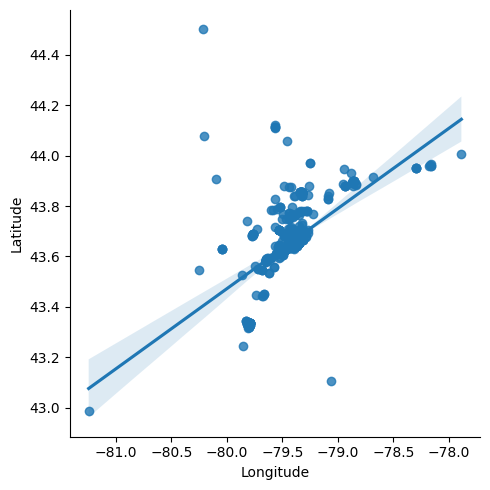

In [12]:
sns.lmplot(x="Longitude", y="Latitude",  data=gta_rentals_filtered)

<Axes: xlabel='Latitude', ylabel='Count'>

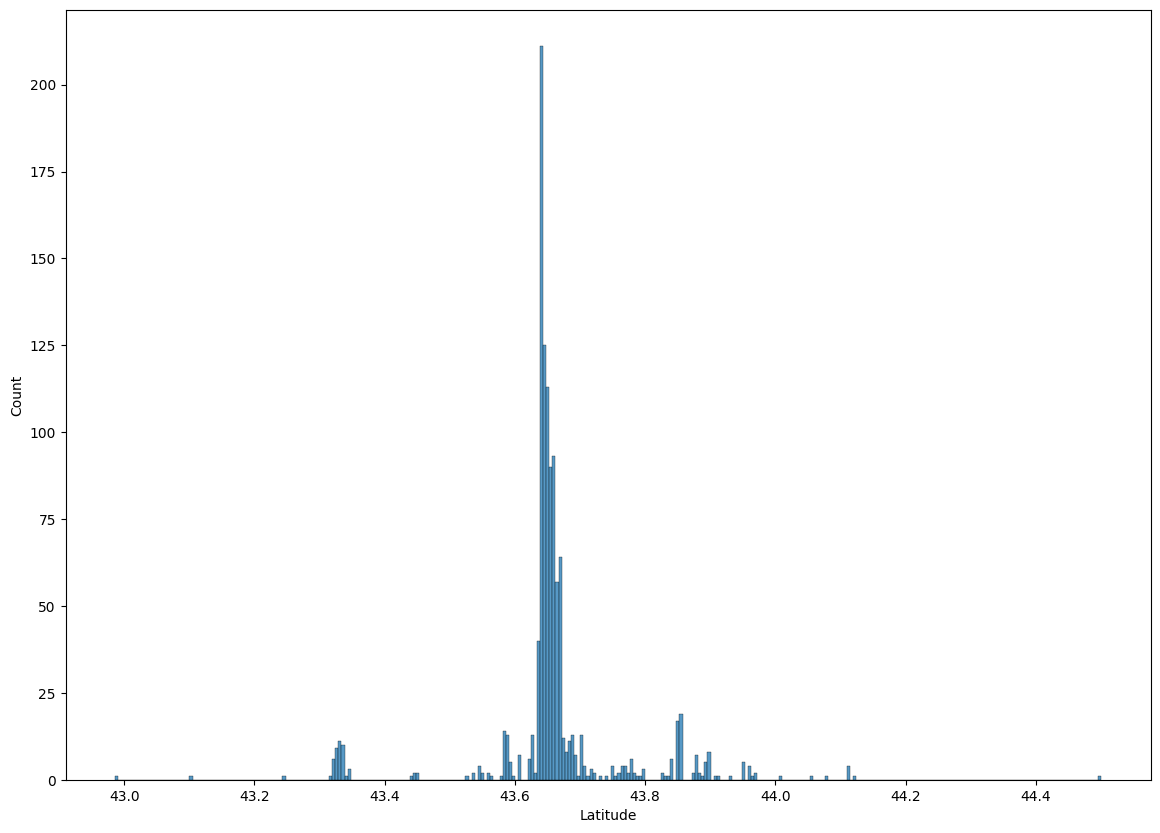

In [13]:
sns.histplot(gta_rentals_filtered["Latitude"])

,Dens,Latitude,Longitude,Price,Sq.Ft,Lat_diff,Long_diff
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,0.152952,43.660399,-79.407949,3633.288014,1179.974061,-0.039601,-0.007949
std,0.360102,0.108103,0.197134,27604.184896,386.887738,0.108103,0.197134
min,0.000000,42.985767,-81.243808,65.000000,500.000000,-0.714233,-1.843808
25%,0.000000,43.641316,-79.412972,1757.750000,893.250000,-0.058684,-0.012972
50%,0.000000,43.650560,-79.387295,2100.000000,1107.500000,-0.049440,0.012705
75%,0.000000,43.666061,-79.377267,2500.000000,1480.000000,-0.033939,0.022733
max,1.000000,44.500769,-77.888152,535000.000000,2000.000000,0.800769,1.511848


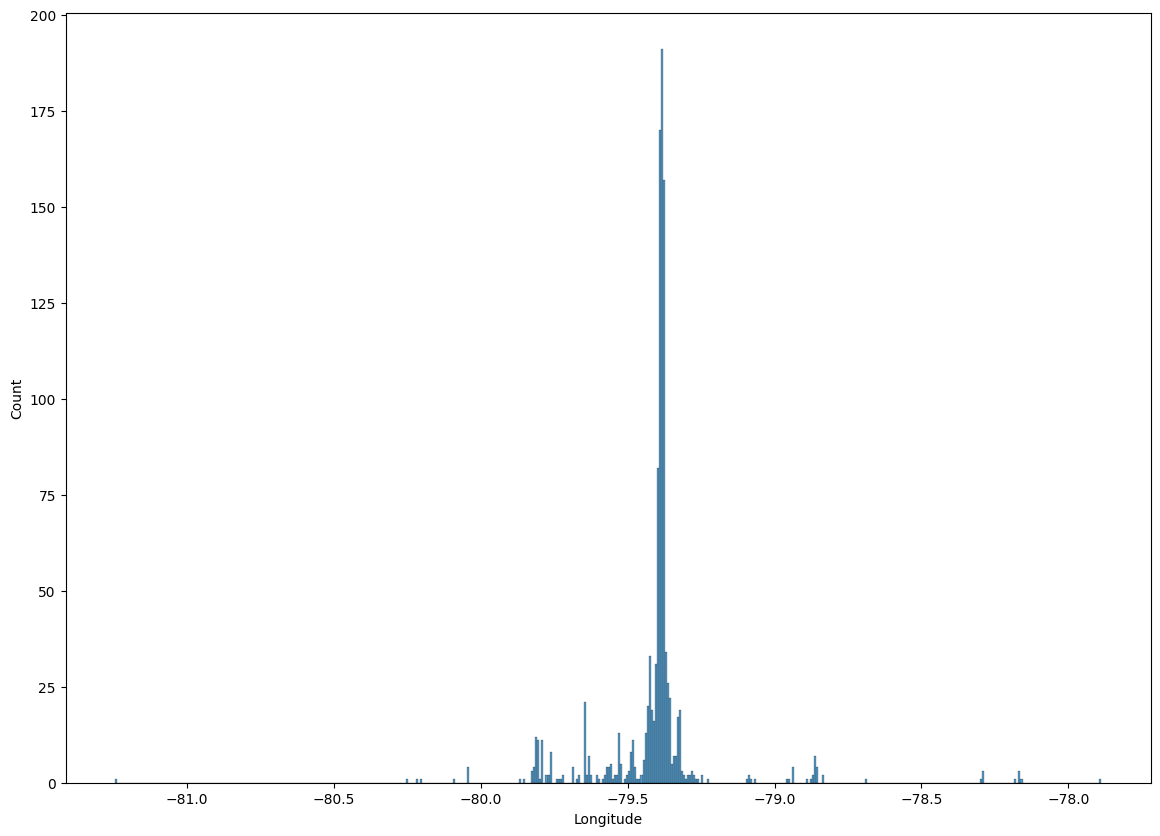

In [14]:
sns.histplot(gta_rentals_filtered["Longitude"]) # SOLUTION

gta_rentals_filtered.describe()


Based on the scatterplot, histograms and descriptive statistics answers are discussed below:


a) How does the range of the new latitude variable compare to your answer in  Question 7 above?
    
The range of the new latitude variable is completely contained within the 43 to 45 range (i.e. the GTA) of Exercise 2 and is much more reasonable than the original latitude variable.

b) How does the range of the new longitude variable compare to your answer in  Question 7 above?
    
The range of the new latitude variable is almost entirely contained within the -79 to -81 range and much more reasonable than the original longitude variable.

c) How do the mean and median of the new latitude variable compare to your answers in Question 7 above?

The original mean of 43.7 and median of 43.65 are now 43.66 and 43.65, respectively (i.e. closer together and data is, therefore, less skewed).
    
d) How do the mean and median of the new longitude variable compare to your answers in Question 7 above?

The original mean of -79.50 and median of -79.39 are now -79.41 and -79.39, respectively (i.e. closer together and data is, therefore, less skewed).

e) Looking at your answers to parts c) and d), which appears to be a more 'stable' measure of central tendency when dealing with non-symmetric data and/or outliers?    
  
It appears that the median is more stable as it wasn't affected by the presence of outliers in the data set.  The mean, however, was affected - once the outliers were removed it tended towards the median value.


Ingested and cleaned GTA apartment rental data, ensuring geographic coordinates (latitude and longitude) were valid and appropriately structured for spatial operations.

Mapped rental listings using interactive geospatial visualizations, leveraging folium to display property locations across the Greater Toronto Area and identify spatial clusters.

Generated choropleth layers to visualize spatial variations in average rent prices across neighborhoods, providing insight into regional affordability trends.

Integrated postal code and neighborhood boundary data, enriching the dataset to allow for spatial aggregation and more meaningful geographic comparisons.

Prepared the data for further spatial modeling, setting the foundation for hotspot detection, proximity analysis, and integration with additional demographic or transit datasets in subsequent phases.